<a href="https://colab.research.google.com/github/claudiobarril/aprendizaje_profundo/blob/main/Barril-Claudio-DL-TP%20Co17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Universidad de Buenos Aires
# Deep Learning - TP
# Cohorte 17 - 5to bimestre 2024


El TP comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta **las 20hs del Lunes 03 de diciembre**. La resolución es individual. Pueden utilizar los contenidos vistos en clase y otra bibliografía. Si se toman ideas de fuentes externas deben ser correctamente citadas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (permitir acceso a las siguientes direcciones: alfonsorafel93@gmail.com y lelectronfou@gmail.com) y **se realizará en el siguiente link de google form: [link](https://docs.google.com/forms/d/e/1FAIpQLScnAC5wu1fIOqDKGrbdV8MZfU6AlJ6B7tBNNpL3qRAEGaudzg/viewform?usp=sf_link)**. Tanto los resultados, como el código y las explicaciones deben quedar guardados y visualizables en el colab.

NO ES NECESARIO QUE NOS ENVIEN COREEO AVISANDO DE LA ENTREGA!

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-TP Co(numero de cohorte).ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.


**Condiciones de aprobación**
- Se aprueba con más del 60% del examen bien resuelto de cada parte del TP (Parte 1 y Parte 2).
- La escala de notas empleada por la UBA es aprobado para nota igual o superior a 4.

# Parte 1
Descargar el dataset del siguiente link: https://drive.google.com/file/d/1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd/view?usp=sharing. El dataset son compras de productos que diferentes clientes realizaron durante un black sales. El dataset contiene información sobre las transacciones y el objetivo es poder utilizarlo para crear diferentes modelos que puedan predecir cuánto un cliente está dispuesto a gastar en un producto en el futuro.
- a) Praparacion del dataset: procesar las variables, explicar los criterios utilizados y analizar las distribuciones.

Particularmente para los puntos b), c) y d) vamos a tratar este problema como una clasificación donde queremos averiguar si el cliente pertenece al grupo 0 (gasta menos de 5000), al grupo 1 (gasta entre 5000 y 10000), al grupo 2 (gasta entre 10000 y 15000) o al grupo 3 (gasta más de 15000).
- b) Definir uno o varios puntos de comparacion (benchmark) para comparar los modelos. Pueden usarse modelos de ML clasico de facil entrenamiento.
- c) Entrenar un modelo de deep learning que no utilice embeddings, **descartando el `product_id` y `user_id`.** . Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos.
- d)	Entrenar un modelo de deep learning que utilice **2 capas de embeddings**, una para los productos y otra para los usuarios. Graficar las evoluciones de la funcion de costo y la metrica de validacion. Explicar el proceso de iteracion utilizado para conseguir los resultados y justificar los resultados obtenidos. Comparar contra el modelo sin embeddings.
Recordar que tanto para el punto c) como el d) pueden usarse herramientas como regularizacion y prueba de hiperpametros para conseguir mejores resultados.
- e) Para el modelo del punto c) implementar una funcion que a reciba un id de usuario y sugiera **n** cantidad usuarios que tuvieron un comportamiento de compras similar.
- f) Para el mejor modelo obtenido en el apartado d) elegir al menos 2 hiperparametros para tunear. Explicar el metodo utilizado y los resultados obtenidos. Recordar de explicar los criterios de eleccion de los hiperpametros, no elegirlos al azar.



Empezamos importando las librerías que utilizaremos a lo largo de esta sección:

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install gdown


Cargamos el archivo para su análisis:

In [10]:
file_id = "1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd"
url = f"https://drive.google.com/uc?id={file_id}"
output_path = "dataset_black_sales.csv"
!gdown {url} -O {output_path}

black_sale_data = pd.read_csv(output_path)

Downloading...
From: https://drive.google.com/uc?id=1X8_G5BpQMi-Nnbtms2RL8lcWSxzD8ixd
To: /content/dataset_black_sales.csv
100% 25.5M/25.5M [00:00<00:00, 83.4MB/s]


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [11]:
shape = black_sale_data.shape
print(f'[{shape[0]}]observaciones - [{shape[1]}]features')
duplicados = black_sale_data.duplicated().sum()
print(f'Total de duplicadas: {duplicados}')
black_sale_data.describe(include='all').T

[550068]observaciones - [12]features
Total de duplicadas: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
User_ID,550068.0,NaN,NaN,NaN,1003028.842401,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Product_ID,550068,3631,P00265242,1880,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,550068,2,M,414259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,550068,7,26-35,219587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,550068.0,NaN,NaN,NaN,8.076707,6.52266,0.0,2.0,7.0,14.0,20.0
City_Category,550068,3,B,231173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stay_In_Current_City_Years,550068,5,1,193821,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_Status,550068.0,NaN,NaN,NaN,0.409653,0.49177,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,NaN,NaN,NaN,5.40427,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,NaN,NaN,NaN,9.842329,5.08659,2.0,5.0,9.0,15.0,18.0


In [14]:
black_sale_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [12]:
black_sale_data.sample(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
295180,1003526,P00132842,M,36-45,2,B,1,1,1,5.0,NaN,11893
164512,1001408,P00234642,M,26-35,0,B,1,1,1,6.0,8.0,8256
519519,1001962,P00033042,F,18-25,1,B,0,1,5,14.0,NaN,5326
451853,1003603,P00164342,F,36-45,7,B,0,1,5,8.0,NaN,2015
219533,1003836,P00010342,F,51-55,8,B,1,0,8,14.0,NaN,6128


In [13]:
for col in black_sale_data.columns:
  print(f'{col}: {black_sale_data[col].nunique()}')

User_ID: 5891
Product_ID: 3631
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 17
Product_Category_3: 15
Purchase: 18105


In [17]:
columns_to_check = ['Gender', 'Age', 'Occupation', 'City_Category',
                    'Stay_In_Current_City_Years', 'Marital_Status',
                    'Product_Category_1', 'Product_Category_2', 'Product_Category_3']

for col in columns_to_check:
  print(f"Distinct values for {col}: {black_sale_data[col].unique()}")

Distinct values for Gender: ['F' 'M']
Distinct values for Age: ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
Distinct values for Occupation: [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
Distinct values for City_Category: ['A' 'C' 'B']
Distinct values for Stay_In_Current_City_Years: ['2' '4+' '3' '1' '0']
Distinct values for Marital_Status: [0 1]
Distinct values for Product_Category_1: [ 3  1 12  8  5  4  2  6 14 11 13 15  7 16 18 10 17  9 20 19]
Distinct values for Product_Category_2: [nan  6. 14.  2.  8. 15. 16. 11.  5.  3.  4. 12.  9. 10. 17. 13.  7. 18.]
Distinct values for Product_Category_3: [nan 14. 17.  5.  4. 16. 15.  8.  9. 13.  6. 12.  3. 18. 11. 10.]


In [18]:
nan_counts_product_category_2 = black_sale_data['Product_Category_2'].isna().sum()
nan_counts_product_category_3 = black_sale_data['Product_Category_3'].isna().sum()

print(f"Cantidad de NaN en Product_Category_2: {nan_counts_product_category_2}")
print(f"Cantidad de NaN en Product_Category_3: {nan_counts_product_category_3}")

Cantidad de NaN en Product_Category_2: 173638
Cantidad de NaN en Product_Category_3: 383247


### Tipos de datos:

- **Variables categóricas**: `User_ID`, `Product_ID`, `Gender`, `Age`, `Occupation`, `City_Category`, `Stay_In_Current_City_Years`, `Marital_Status`
- **Variables numéricas**: `Purchase`.
- `Product_Category_1`, `Product_Category_2`, `Product_Category_3` no podría identificar a priori si son identificadores de los productos de las correspondientes categorías, o bien cantidades de productos de esa categoría en la compra. Quizás podemos discernir viendo las distribuciones.

### Análisis de los datos:

- Contamos con 550068 observaciones y 12 variables.
- User_ID y Product_ID tienen muy alta cardinalidad (5891 y 3631 valores únicos respectivamente).
- Age cuenta con rangos de edades del comprador como categorías. No todos los rangos incluyen misma cantidad de edades.
- Desconocemos a priori el significado de los valores Occupation, City_Category y Marital_Status
- Product_Category_N son variables numéricas enteras. Tenemos missings para Product_Category_2 y Product_Category_3.


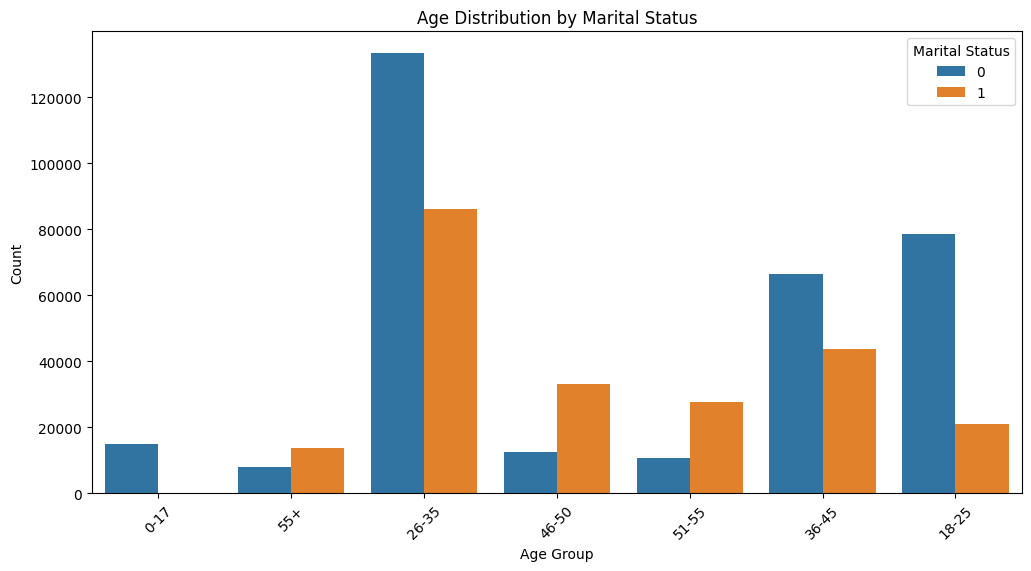

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Marital_Status', data=black_sale_data)
plt.title('Age Distribution by Marital Status')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.show()

Con esto podemos asumir que Marital_Status es 0 para solteros y 1 para casados, a sabiendas que quedan otros posibles significados afuera.

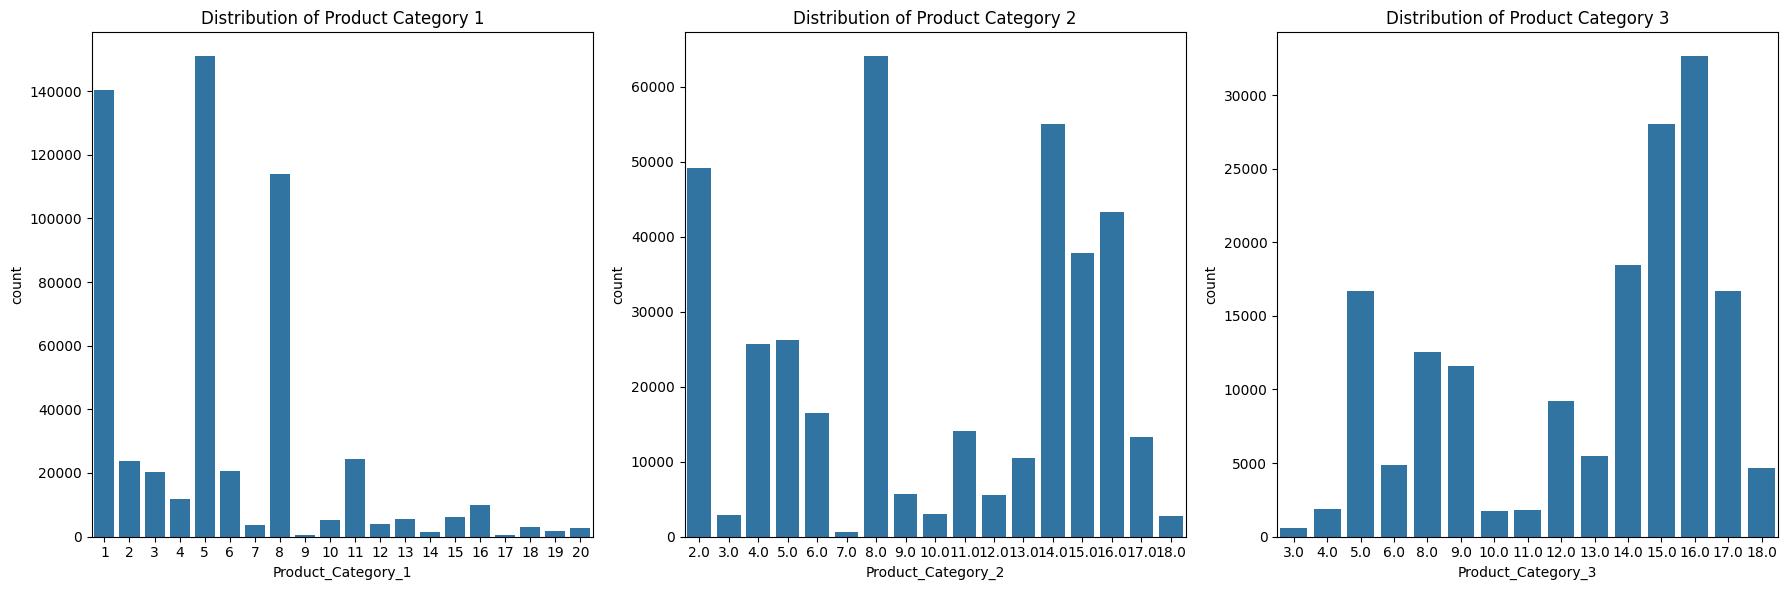

In [22]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='Product_Category_1', data=black_sale_data)
plt.title('Distribution of Product Category 1')

plt.subplot(1, 3, 2)
sns.countplot(x='Product_Category_2', data=black_sale_data)
plt.title('Distribution of Product Category 2')

plt.subplot(1, 3, 3)
sns.countplot(x='Product_Category_3', data=black_sale_data)
plt.title('Distribution of Product Category 3')

plt.tight_layout()
plt.show()

Las distribuciones parecen indicar que se tratan de identificadores de productos dentro de las categorías. Desde ya, no tenemos noción de qué categorías corresponden.

# Parte 2.a

Implemente una arquitectura de red neuronal basada en CNN para identificar del dataset fashion MNIST las 10 clases del mismo. Sobre dicho modelo, realize una exploración de 5 variantes distintas (que se desprenden del modelo propuesto) variando alguno (o varios) de los siguientes hiperparámetros:
- numero de capas.
- numero de kernels.
- tamaño de kernels.


Evalue la evolución de la función de perdida y la accuracy (para train y test) para cada modelo en una gráfica con las curvas de los 5 modelos propuestos. Compare también el tiempo de entrenamiento y peso (tamaño) de cada modelo. Aplique técnicas de regularización para evitar overfitting. Elija el modelo que considera mejor y justifique.
Entregables:
 - Grafica comparativa de función de perdida vs epochs para los 5 modelos.
 - Grafica comparativa de función de accuracy vs epochs para los 5 modelos.
 - Tabla comparativa (o grafico de barras) del tiempo de entrenamiento y pesos de cada modelo.
 - Justificación del modelo elegio (qué consideró para elegir el modelo y bajo qué criterio).



In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [ ]:
# Download train data from open datasets.
train_data= datasets.FashionMNIST(root='data', train=True, download=True, transform=ToTensor(),)

# Download test data from open datsets.
test_data=datasets.FashionMNIST(root='data', train=False, download=True, transform=ToTensor(),)


100%|██████████| 26421880/26421880 [00:02<00:00, 12594801.85it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 199486.41it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3758955.28it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4915155.25it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



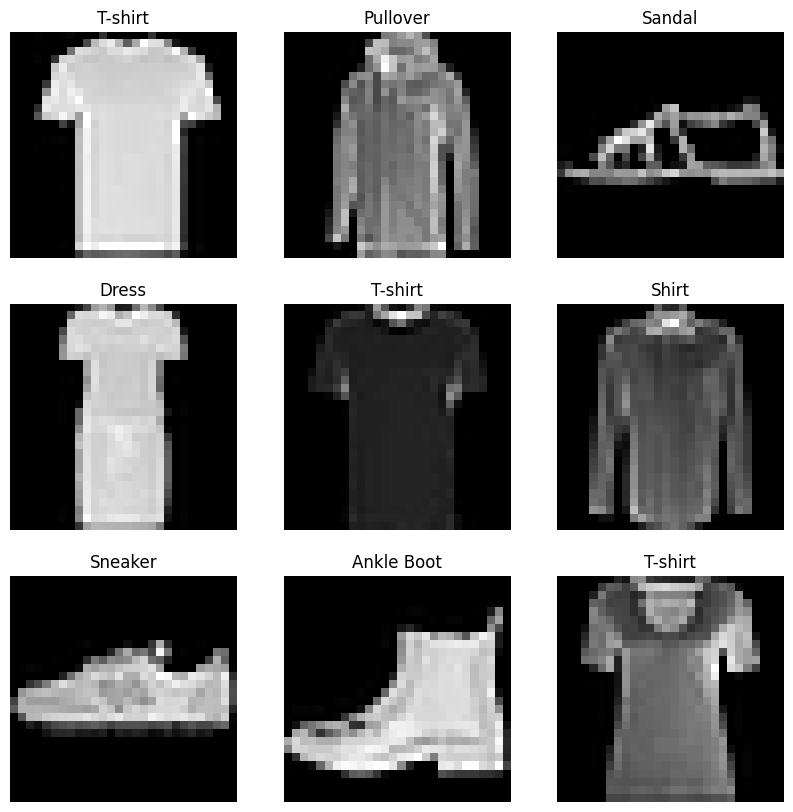

In [ ]:
import matplotlib.pyplot as plt

labels_map={
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot',
}

figure = plt.figure(figsize = (10,10))
cols, rows = 3, 3

for i in range (1, cols*rows + 1):
    sample_idx = torch.randint(len(train_data), size = (1,)).item()
    image, label = train_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(image.squeeze(), cmap='gray')
plt.show()

# Parte 2.b

Empleando el modelo entrenado y elegido por Ud. en el punto anterior **(NO USAR RESNET U OTRO MODELO DISPONIBLE, TIENE QUE USAR EL QUE UD DESARROLLÓ)**, realice transfer learning para procesar las imágenes del dataset MNIST (los números) **e identificar los números mayores o menores a 4,5**.
Para el entrenamiento emplee solamente 20.000 muestras del set de entrenamiento y valide con el set de testeo. Al reducir el train set, mantenga equilibrada la distribución de las clases.

Elija la estrategia de transfer learning acorde a los visto en la teoría y justifique su elección.

Compare las curvas de entrenamiento y accurracy empleando transfer learning o usando la arquitectura elejida en el punto anterior pero entrenando desde cero.
Entregables:
- Estrategia elegida y su justificación.
- Grafica comparativa de función de perdida vs epochs para el modelo con transfer learning y sin transfer learning.
- Grafica comparativa de función de accuracy vs epochs para el modelo con transfer learning y sin transfer learning.
- Comentarios sobre las curvas graficadas.
